# 第 5 章 网络结构数据的经典模型

## 导入库

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from modules.tools import graph_info, map_color, count_kstar, count_triangle

sns.set_theme(font='SimHei')

## 生成ER随机图

In [2]:
# 生成网络
g = nx.gnp_random_graph(n=100, p=0.01, seed=42)
graph_info(g)

Graph with 100 nodes and 55 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 0  -- 20	[ 1] 1  -- 27	[ 2] 2  -- 75	[ 3] 2  -- 96	[ 4] 3  -- 7 
[ 5] 3  -- 78	[ 6] 4  -- 9 	[ 7] 4  -- 42	[ 8] 4  -- 96	[ 9] 7  -- 20
[10] 9  -- 37	[11] 10 -- 92	[12] 12 -- 24	[13] 12 -- 59	[14] 12 -- 65
[15] 15 -- 27	[16] 20 -- 38	[17] 20 -- 67	[18] 22 -- 37	[19] 24 -- 37
[20] 24 -- 45	[21] 24 -- 78	[22] 25 -- 72	[23] 28 -- 61	[24] 29 -- 81
[25] 30 -- 39	[26] 30 -- 59	[27] 30 -- 64	[28] 30 -- 83	[29] 32 -- 96
...


In [3]:
# 计算网络密度
nx.density(g)

0.011111111111111112

In [4]:
# 计算度均值
np.mean(list(dict(g.degree()).values()))

1.1

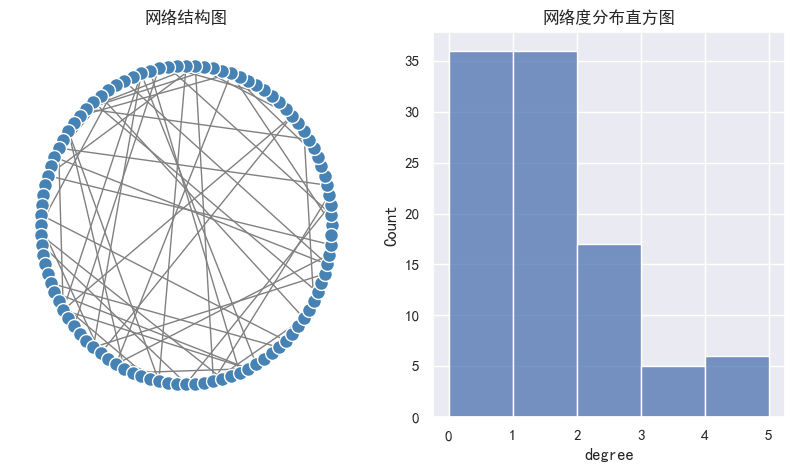

In [5]:
# 设置画布
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 绘制网络结构图
pos = nx.circular_layout(g)
nx.draw(
    g, pos, 
    node_color='steelblue', 
    node_size=100, 
    edgecolors='white', 
    edge_color='gray',
    ax=ax[0]
)
ax[0].set_title('网络结构图')

# 绘制网络度分布直方图
d = pd.DataFrame(g.degree(), columns=['node', 'degree'])
sns.histplot(d['degree'], binwidth=1, ax=ax[1])
ax[1].set_title('网络度分布直方图')

plt.show()

## 给定度分布生成网络

In [6]:
# 从二项分布生成100个随机数
np.random.seed(42)
degree_dist = np.random.binomial(n=99, p=0.01, size=100)
# 根据度分布生成网络
g = nx.configuration_model(degree_dist, seed=42)
graph_info(g)

Graph with 100 nodes and 44 edges.
Graph type:      undirected unweighted multigraph 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 0  -- 52	[ 1] 1  -- 9 	[ 2] 1  -- 41	[ 3] 1  -- 92	[ 4] 2  -- 96
[ 5] 3  -- 52	[ 6] 7  -- 75	[ 7] 7  -- 43	[ 8] 8  -- 60	[ 9] 11 -- 74
[10] 11 -- 11	[11] 12 -- 24	[12] 12 -- 80	[13] 17 -- 73	[14] 18 -- 69
[15] 20 -- 76	[16] 25 -- 69	[17] 25 -- 67	[18] 27 -- 69	[19] 28 -- 35
[20] 30 -- 76	[21] 33 -- 33	[22] 33 -- 50	[23] 34 -- 67	[24] 34 -- 38
[25] 34 -- 54	[26] 35 -- 53	[27] 39 -- 52	[28] 43 -- 55	[29] 45 -- 51
...


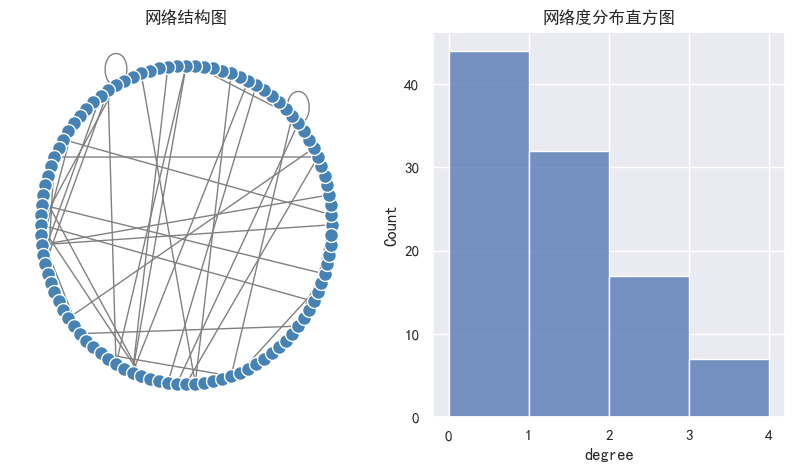

In [7]:
# 设置画布
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 绘制网络结构图
pos = nx.circular_layout(g)
nx.draw(
    g, pos, 
    node_color='steelblue', 
    node_size=100, 
    edgecolors='white', 
    edge_color='gray',
    ax=ax[0]
)
ax[0].set_title('网络结构图')

# 绘制网络度分布直方图
d = pd.DataFrame(g.degree(), columns=['node', 'degree'])
sns.histplot(d['degree'], binwidth=1, ax=ax[1])
ax[1].set_title('网络度分布直方图')

plt.show()

## fb数据的简单统计

In [8]:
# 读取边数据
fb_edge = pd.read_csv(
    '../../Data/fb-pages-tvshow-edges.txt', 
    sep='\t', header=None, names=['node1', 'node2']
)
# 由边数据生成网络
g_fb = nx.from_pandas_edgelist(fb_edge, source='node1', target='node2')
graph_info(g_fb)

Graph with 3892 nodes and 17262 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 1    -- 1839	[ 1] 1    -- 1745	[ 2] 1    -- 15  	[ 3] 1    -- 2544
[ 4] 1839 -- 2014	[ 5] 1839 -- 2715	[ 6] 1745 -- 1074	[ 7] 1745 -- 1319
[ 8] 1745 -- 2544	[ 9] 1745 -- 2715	[10] 15   -- 2083	[11] 15   -- 181 
[12] 15   -- 2939	[13] 2544 -- 1319	[14] 2544 -- 2014	[15] 2544 -- 3017
[16] 2544 -- 2715	[17] 2    -- 1010	[18] 2    -- 1172	[19] 2    -- 1466
[20] 2    -- 2070	[21] 2    -- 2081	[22] 2    -- 1857	[23] 2    -- 3800
...


In [9]:
# 计算网络密度
nx.density(g_fb)

0.0022797490611982272

In [10]:
# 计算2-star、3-star和三角形个数
count_kstar(g_fb, k=2), count_kstar(g_fb, k=3), count_triangle(g_fb)

(442348, 7491010, 87090)

## 模仿fb实际数据生成ER图

In [11]:
# 由ER随机图模型生成网络
g_er = nx.gnp_random_graph(n=3892, p=0.002, seed=42)
graph_info(g_er)

Graph with 3892 nodes and 14869 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 0    -- 125 	[ 1] 0    -- 369 	[ 2] 0    -- 395 	[ 3] 0    -- 2544
[ 4] 0    -- 2564	[ 5] 0    -- 2756	[ 6] 0    -- 2925	[ 7] 0    -- 2991
[ 8] 0    -- 3518	[ 9] 1    -- 212 	[10] 1    -- 461 	[11] 1    -- 608 
[12] 1    -- 1120	[13] 1    -- 1339	[14] 1    -- 3285	[15] 1    -- 3290
[16] 2    -- 204 	[17] 2    -- 362 	[18] 2    -- 530 	[19] 2    -- 925 
[20] 2    -- 1933	[21] 2    -- 2031	[22] 2    -- 3184	[23] 2    -- 3666
...


In [12]:
# 计算2-star、3-star和三角形个数
count_kstar(g_er, k=2), count_kstar(g_er, k=3), count_triangle(g_er)

(113831, 290431, 73)

## 律师合作网络示例

In [13]:
lazega = nx.read_graphml('../../Data/lazega.graphml')
graph_info(lazega)

Graph with 36 nodes and 115 edges.
Graph type:      undirected unweighted 
Node attributes: name Seniority Status Gender Office Years Age Practice School 
Edge attributes: 
Edge list:
[ 0] V1  -- V17	[ 1] V2  -- V7 	[ 2] V2  -- V16	[ 3] V2  -- V17	[ 4] V2  -- V22
[ 5] V2  -- V26	[ 6] V2  -- V29	[ 7] V3  -- V18	[ 8] V3  -- V25	[ 9] V3  -- V28
[10] V4  -- V12	[11] V4  -- V17	[12] V4  -- V19	[13] V4  -- V20	[14] V4  -- V22
[15] V4  -- V26	[16] V4  -- V28	[17] V4  -- V29	[18] V4  -- V31	[19] V5  -- V18
[20] V5  -- V24	[21] V5  -- V28	[22] V5  -- V31	[23] V5  -- V32	[24] V5  -- V33
[25] V6  -- V24	[26] V6  -- V28	[27] V6  -- V30	[28] V6  -- V31	[29] V6  -- V32
...


现有的`networkx`库中没有提供对`Exponential Random Graph Model`估计的工具，可以使用`R`中的`ergm`包进行估计。

这里采用点估计的方式来简单计算一下`graph ~ edges`模型的参数估计结果。

In [14]:
# 将网络密度作为连边概率的点估计
p = nx.density(lazega)
p

0.18253968253968253

In [15]:
# 进一步地，将连边概率转换为对数几率（log odds）的点估计
theta = np.log(p / (1 - p))
theta

-1.4992347723004862

书中更加复杂模型仍建议使用`R`中的`ergm`包来完成估计，下面不做展示。

## 随机分块模型

In [16]:
# 构建块矩阵
pm = np.array([
    [  0.3, 0.002],
    [0.002,  0.08]
])
# 由简单随机分块模型生成网络
g = nx.stochastic_block_model(sizes=[30, 70], p=pm, seed=42)
graph_info(g)

stochastic_block_model with 100 nodes and 336 edges.
Graph type:      undirected unweighted 
Node attributes: block 
Edge attributes: 
Edge list:
[ 0] 0  -- 2 	[ 1] 0  -- 3 	[ 2] 0  -- 4 	[ 3] 0  -- 8 	[ 4] 0  -- 10
[ 5] 0  -- 11	[ 6] 0  -- 13	[ 7] 0  -- 14	[ 8] 0  -- 17	[ 9] 0  -- 20
[10] 0  -- 24	[11] 0  -- 27	[12] 0  -- 28	[13] 1  -- 14	[14] 1  -- 15
[15] 1  -- 16	[16] 1  -- 17	[17] 1  -- 18	[18] 1  -- 19	[19] 1  -- 20
[20] 1  -- 24	[21] 1  -- 25	[22] 1  -- 29	[23] 2  -- 4 	[24] 2  -- 12
[25] 2  -- 13	[26] 2  -- 15	[27] 2  -- 16	[28] 2  -- 24	[29] 2  -- 25
...


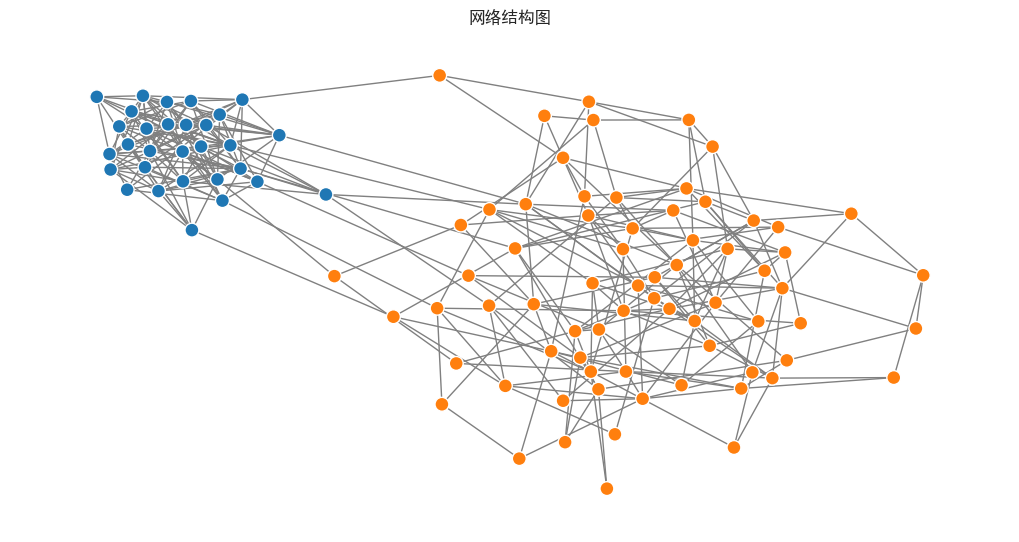

In [17]:
# 设置画布
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(g, seed=42)
nx.draw(
    g, pos, 
    node_color=map_color(g, 'block'),
    node_size=100, 
    edgecolors='white', 
    edge_color='gray'
)
plt.title('网络结构图')
plt.show()